Load the Flights Dataset

In [24]:
import pandas as pd

flights = pd.read_csv('flights.csv')
flights.head()

,Month,Day,Weekday,Airline,Origin,Dest,AirTime,Distance,ArrivalDelay,Diverted,Cancelled,Date
0,1,1,Wed,WN,LAX,SLC,94.0,590,65.0,0,0,1/1
1,1,1,Wed,UA,DEN,IAD,154.0,1452,-13.0,0,0,1/1
2,1,1,Wed,MQ,DFW,VPS,85.0,641,35.0,0,0,1/1
3,1,1,Wed,AA,DFW,DCA,126.0,1192,-7.0,0,0,1/1
4,1,1,Wed,WN,LAX,MCI,166.0,1363,39.0,0,0,1/1


**1**. Find the month and day in which the longest arrival delay occurred.

In [23]:
import pandas as pd

flight_data = pd.read_csv('flights.csv')

max_delay_row = flight_data.loc[flight_data['ArrivalDelay'].idxmax()]
date_with_max_delay = max_delay_row[['Month', 'Day']]
print(date_with_max_delay)


Month    12
Day      30
Name: 58188, dtype: object


**2**. Find the three airlines with the longest arrival delays.

In [21]:
import pandas as pd

flight_data = pd.read_csv('flights.csv')

mean_delays = flight_data.groupby('Airline')['ArrivalDelay'].agg('mean')
top_three_airlines = mean_delays.nlargest(3)
print(top_three_airlines)


Airline
NK    18.436070
F9    13.630651
B6     8.692593
Name: ArrivalDelay, dtype: float64


**3**. Find the three airlines with the highest number of cancelled or diverted flights.

In [18]:
import pandas as pd

flight_data = pd.read_csv('flights.csv')

filtered_flights = flight_data[(flight_data['Cancelled'] == 1) | (flight_data['Diverted'] == 1)]
counts_by_airline = filtered_flights['Airline'].value_counts()
top_three_airlines = counts_by_airline.nlargest(3)
print(top_three_airlines)


Airline
AA    180
OO    163
EV    161
Name: count, dtype: int64


**4**. Find the airlines with more than 2% of cancelled flights. For each such airline, print its name
and the precentage of cancelled flights.

In [17]:
import pandas as pd

flight_data = pd.read_csv('flights.csv')

total_by_airline = flight_data['Airline'].value_counts()
cancelled_by_airline = flight_data.query('Cancelled == 1')['Airline'].value_counts()
cancelled_percentage = (cancelled_by_airline / total_by_airline * 100).dropna()
filtered_airlines = cancelled_percentage[cancelled_percentage > 2]
for carrier, percent in filtered_airlines.items():
    print(f"Airline: {carrier}, Cancelled Flight Percentage: {percent:.2f}%")


Airline: EV, Cancelled Flight Percentage: 2.49%
Airline: MQ, Cancelled Flight Percentage: 4.38%
Airline: OO, Cancelled Flight Percentage: 2.16%


**5**. For each origin and destination, find the average and variance of the airtime.

In [16]:
import pandas as pd

data = pd.read_csv('flights.csv')

airtime_metrics = data.groupby(['Origin', 'Dest'])['AirTime'].agg(average='mean', variance='var').reset_index()
airtime_metrics.columns = ['Departure', 'Arrival', 'AvgAirTime', 'VarAirTime']
print(airtime_metrics)


     Departure Arrival  AvgAirTime  VarAirTime
0          ATL     ABE   96.387097   45.778495
1          ATL     ABQ  170.500000   87.866667
2          ATL     ABY   28.578947    6.590643
3          ATL     ACY   91.333333   11.466667
4          ATL     AEX   78.725000   47.332692
...        ...     ...         ...         ...
1125       SFO     SNA   64.059322   11.338331
1126       SFO     STL  198.900000  101.042105
1127       SFO     SUN   78.000000   25.777778
1128       SFO     TUS  100.200000   35.221053
1129       SFO     XNA  173.500000    0.500000

[1130 rows x 4 columns]


**6**. Find the airline that makes the most flights between 500 and 1,000 miles.

In [15]:
import pandas as pd

flight_data = pd.read_csv('flights.csv')

mid_range_flights = flight_data.query('500 <= Distance <= 1000')
airline_counts = mid_range_flights['Airline'].value_counts()
top_airline = airline_counts.idxmax()
top_flight_count = airline_counts.max()
print(f"Top airline for flights between 500 and 1,000 miles: {top_airline} with {top_flight_count} flights.")


Top airline for flights between 500 and 1,000 miles: DL with 4248 flights.


**7**. Create a bar plot showing the number of flights originating from each city.

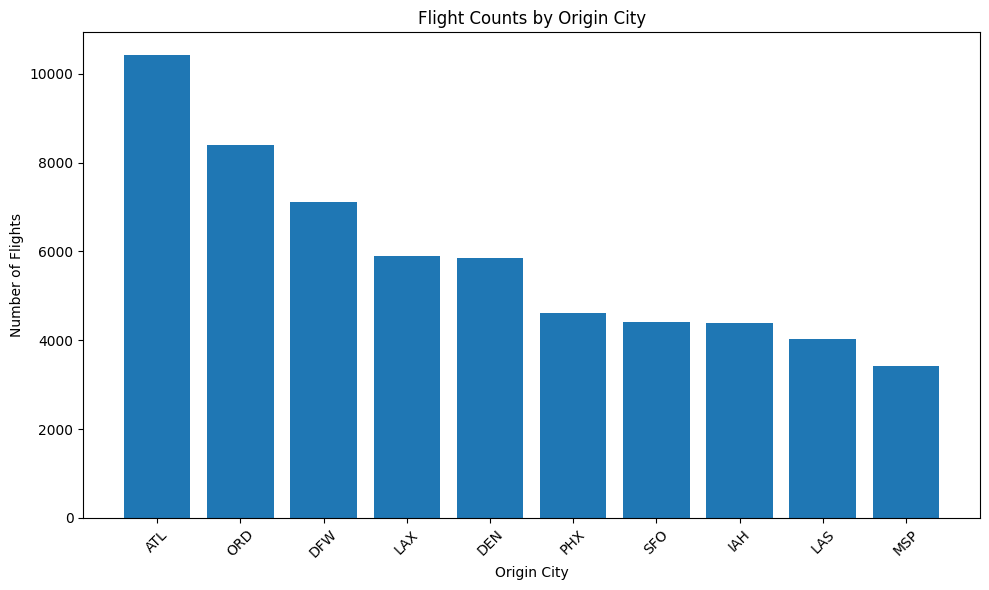

In [14]:
from matplotlib import pyplot as plt
import pandas as pd

data = pd.read_csv('flights.csv')

origin_counts = data['Origin'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(origin_counts.index, origin_counts.values)

plt.xlabel('Origin City')
plt.ylabel('Number of Flights')
plt.title('Flight Counts by Origin City')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**8**. Change the Weekday column to have the day name instead of day number, e.g. 1 - Sun, 2 - Mon, etc.

In [7]:
import pandas as pd

flight_records = pd.read_csv('flights.csv')

day_names = {1: 'Sun', 2: 'Mon', 3: 'Tue', 4: 'Wed', 5: 'Thu', 6: 'Fri', 7: 'Sat'}
flight_records['DayName'] = flight_records['Weekday'].replace(day_names)
flight_records.to_csv('flights.csv', index=False) #  putting back in csv
print("Day names have been saved to 'flights.csv'.")


Weekday column has been updated in 'flights.csv'.


**9**. Join the Month and Day columns into a single column named Date. For example, if month=3, day=15, the date column should have 3/15.

In [9]:
import pandas as pd

flight_data = pd.read_csv('flights.csv')
flight_data['CombinedDate'] = flight_data['Month'].map(str) + '/' + flight_data['Day'].map(str)
flight_data.to_csv('flights.csv', index=False)
print("'CombinedDate' has been saved to 'flights.csv'.")

The 'Date' column has been added to 'flights.csv'.


**10**. Find the longest sequence of on-time flights per airline (an on-time flight is a flight with less than 15 minutes arrival delay). <br> Hint: use the [cumsum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html) function.

In [10]:
import pandas as pd

data = pd.read_csv('flights.csv')

data['IsOnTime'] = data['ArrivalDelay'] < 15
airline_sequences = []
for air_carrier, subset in data.groupby('Airline'):
    subset['OnTimeStreak'] = (~subset['IsOnTime']).cumsum()
    streak_lengths = subset[subset['IsOnTime']].groupby('OnTimeStreak').size()
    max_streak = streak_lengths.max() if not streak_lengths.empty else 0
    airline_sequences.append((air_carrier, max_streak))

streak_df = pd.DataFrame(airline_sequences, columns=['Airline', 'MaxOnTimeStreak'])
print(streak_df)


   Airline  MaxOnTimeStreak
0       AA               50
1       AS               48
2       B6               25
3       DL               91
4       EV               42
5       F9               22
6       HA               17
7       MQ               51
8       NK               24
9       OO               36
10      UA               46
11      US               44
12      VX               38
13      WN               43
